# Yulu - Hypothesis Testing
* Yulu has recently suffered considerable dips in its revenues. 
* They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. 
* Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm, poisson, expon, geom
from scipy.stats import zscore, ttest_rel, ttest_ind, ttest_1samp, f_oneway, kruskal, chisquare, chi2_contingency, kstest, pearsonr, spearmanr

In [2]:
df = pd.read_csv('bike_sharing.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape
# 12 columns, 10.9k records

(10886, 12)

In [4]:
df.isnull().sum()
# no null values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [5]:
# Changing data types to category for below columns based on column profiling given in question.
df[['season','holiday','workingday','weather']] = df[['season','holiday','workingday','weather']].astype('category')
df['datetime'] = pd.to_datetime(df['datetime'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [7]:
describe = df.describe(include='all',datetime_is_numeric=True)
describe

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.0,10886.0,10886.0,10886.0,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
unique,NaN,4.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2734.0,10575.0,7412.0,7192.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011-12-27 05:56:22.399411968,NaN,NaN,NaN,NaN,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,NaN,NaN,NaN,NaN,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,NaN,NaN,NaN,NaN,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,NaN,NaN,NaN,NaN,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,NaN,NaN,NaN,NaN,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
df.insert(1,'year',df['datetime'].dt.year)
df.insert(2,'month',df['datetime'].dt.month)
df.insert(3,'day',df['datetime'].dt.day)
df.insert(4,'day_of_week',df['datetime'].dt.day_of_week)
df.insert(5,'hour',df['datetime'].dt.hour)
df.drop(columns='datetime',inplace=True)
df

,year,month,day,day_of_week,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,1,5,0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011,1,1,5,1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011,1,1,5,2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011,1,1,5,3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011,1,1,5,4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,19,2,19,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012,12,19,2,20,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012,12,19,2,21,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012,12,19,2,22,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## Visual analysis

<Axes: xlabel='weather', ylabel='count'>

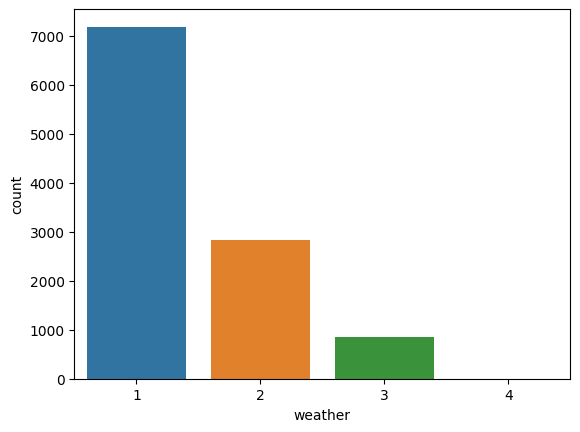

In [101]:
sns.countplot(df, x='weather')

<Axes: xlabel='season', ylabel='count'>

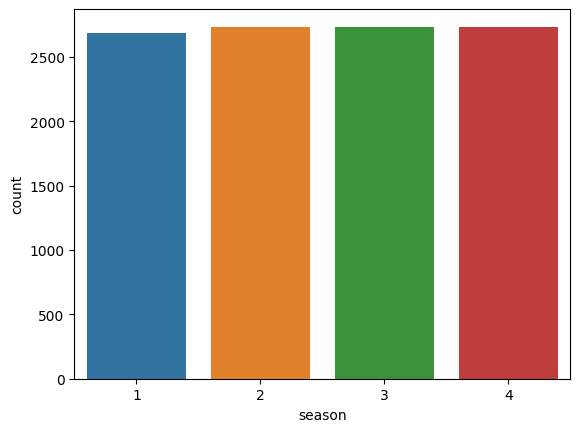

In [102]:
sns.countplot(df, x='season')

<Axes: xlabel='workingday', ylabel='count'>

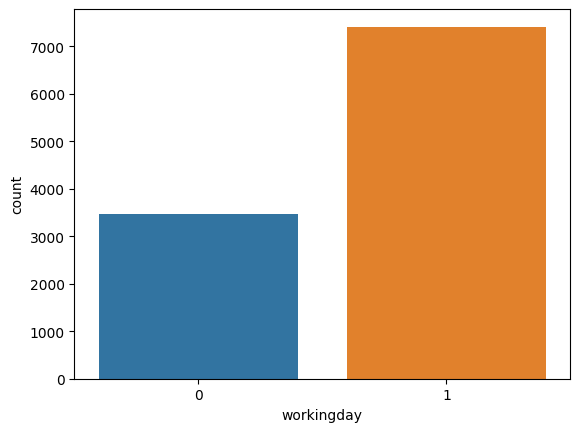

In [103]:
sns.countplot(df, x='workingday')

<Axes: xlabel='holiday', ylabel='count'>

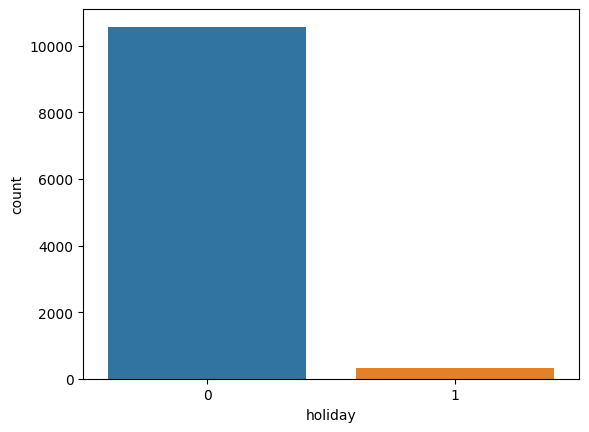

In [104]:
sns.countplot(df, x='holiday')

<Axes: xlabel='weather', ylabel='count'>

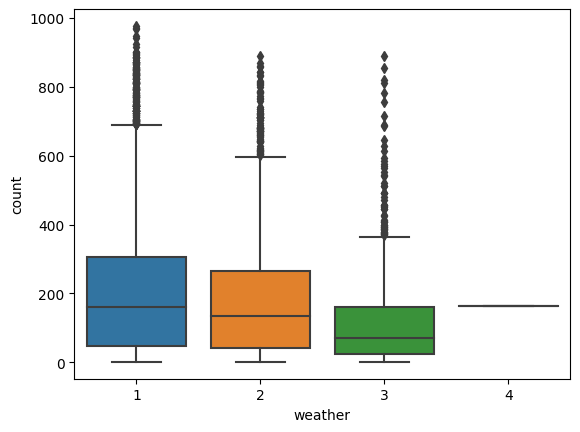

In [91]:
sns.boxplot(x=df['weather'],y=df['count'])

<Axes: xlabel='season', ylabel='count'>

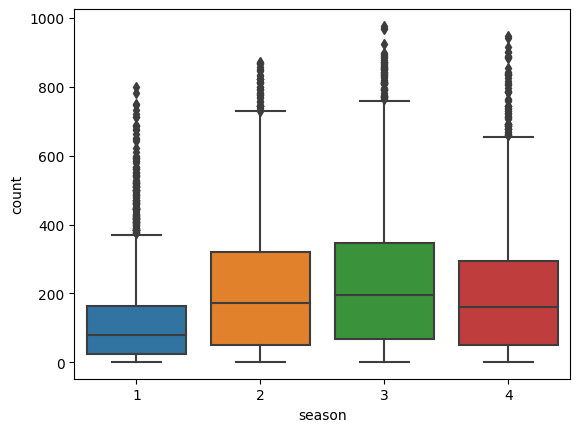

In [92]:
sns.boxplot(x=df['season'],y=df['count'])

<Axes: xlabel='workingday', ylabel='count'>

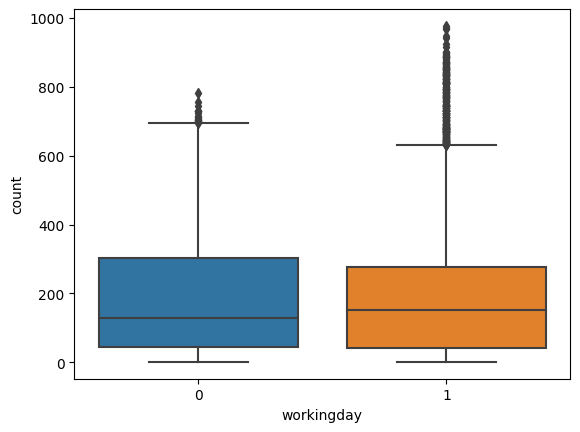

In [118]:
sns.boxplot(x=df['workingday'],y=df['count'])

<Axes: xlabel='workingday', ylabel='casual'>

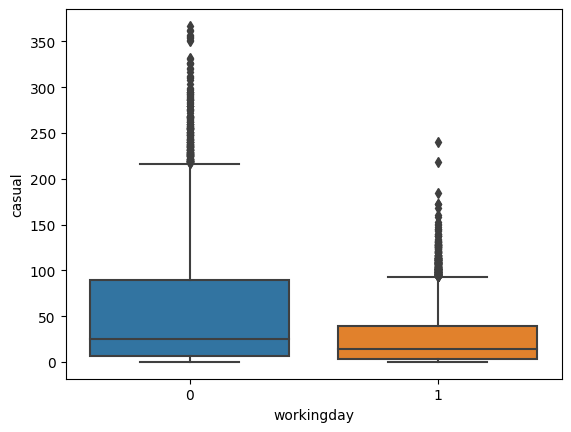

In [119]:
sns.boxplot(x=df['workingday'],y=df['casual'])

<Axes: xlabel='workingday', ylabel='registered'>

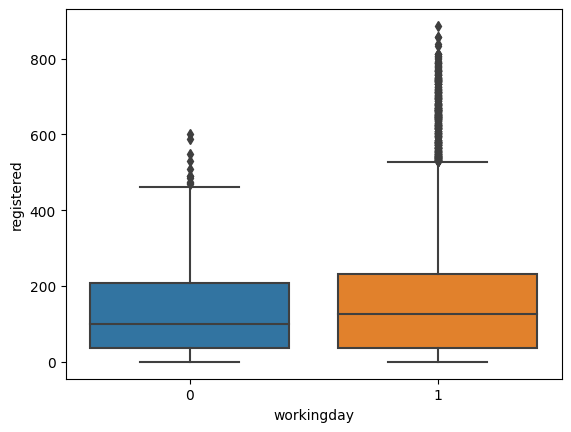

In [120]:
sns.boxplot(x=df['workingday'],y=df['registered'])

<Axes: xlabel='day_of_week', ylabel='count'>

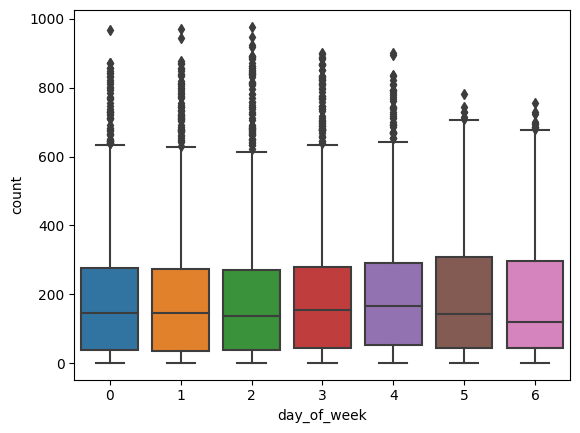

In [124]:
sns.boxplot(x=df['day_of_week'],y=df['count'])

#### Insights from above Visual analysis:
1. On most days, weather was 1. (Clear, Few clouds, partly cloudy)
2. Season is pretty well distributed in given data.
3. Lot of outliers present in given data. But no need to remove them as it might not give us correct hypothesis result going ahead.
4. Weather 1 has highest median  no. of cycles rented out of all 4 weathers.
5. Season 3 (fall) has highest median no. of cycles rented out of all 4 seasons. 
6. Working day has higher median no. of cycles rented than non-working day.
7. Casual users > registered users on non-working day.
8. Registered users > casual users on working day.
9. 4th day of week (Friday) is the best day in terms of no. of cycles rented.

## Now starting with Hypothesis testing !!!

# Working Day has an effect on the number of electric cycles rented.

In [9]:
df_working = df.loc[df['workingday'] == 1,['casual','registered','count']]
df_not_working = df.loc[df['workingday'] == 0,['casual','registered','count']]
print(df_working.shape)
print(df_not_working.shape)
# We don't have same length for both samples. So, we will use ttest_ind.

(7412, 3)
(3474, 3)


In [10]:
significance_value = 0.05

1. Casual Users
    * Null Hypothesis (H0) - No effect of working day on number of electric cycles rented.
    * Alternate Hypothesis (Ha) - Electric cycles rented are higher on non-working day than working day.

In [11]:
t_statistic, p_value = ttest_ind(df_working['casual'],df_not_working['casual'],alternative='less')
if p_value > significance_value:
    print('Fail to reject H0')
else:
    print('Reject H0')
print(f't_statistic = {t_statistic}')
print(f'p_value = {p_value}')

Reject H0
t_statistic = -35.12830185964087
p_value = 1.7809837118027202e-256


2. Registered Users
    * Null Hypothesis (H0) - No effect of working day on number of electric cycles rented.
    * Alternate Hypothesis (Ha) - Electric cycles rented are higher on working day than non-working day.

In [12]:
t_statistic, p_value = ttest_ind(df_working['registered'],df_not_working['registered'],alternative='greater')
if p_value > significance_value:
    print('Fail to reject H0')
else:
    print('Reject H0')
print(f't_statistic = {t_statistic}')
print(f'p_value = {p_value}')

Reject H0
t_statistic = 12.552707000266874
p_value = 3.403246859958037e-36


3. Total Users
    * Null Hypothesis (H0) - No effect of working day on number of electric cycles rented.
    * Alternate Hypothesis (Ha) - Electric cycles rented are higher on working day than non-working day.

In [13]:
t_statistic, p_value = ttest_ind(df_working['count'],df_not_working['count'],alternative='greater')
if p_value > significance_value:
    print('Fail to reject H0')
else:
    print('Reject H0')
print(f't_statistic = {t_statistic}')
print(f'p_value = {p_value}')

Fail to reject H0
t_statistic = 1.2096277376026694
p_value = 0.11322402113180674


##### Inference from above analysis:
1. **Casual Users:** No. of electric cycles are rented more on non-working days than working days by casual users.
2. **Registered Users:** No. of electric cycles are rented more on working days than non-working days by registered users.
3. **Total Users:** Overall there isn't much difference in no. of electric cycles rented  working day and non-working days.

# No. of cycles rented similar or different in different seasons

* Null Hypothesis (H0) - No difference in no. of electric cycles rented in different seasons
* Alternate Hypothesis (Ha) - Significant difference in no. of electric cycles rented in different season.

In [14]:
season_1 = df.loc[df['season']==1,['casual','registered','count']]
season_2 = df.loc[df['season']==2,['casual','registered','count']]
season_3 = df.loc[df['season']==3,['casual','registered','count']]
season_4 = df.loc[df['season']==4,['casual','registered','count']]
print(season_1.shape)
print(season_2.shape)
print(season_3.shape)
print(season_4.shape)

(2686, 3)
(2733, 3)
(2733, 3)
(2734, 3)


In [56]:
# Lets check whether above 4 season samples are normally distributed or not.
# H0 - Distrubution is gaussian
# Ha - Distribution is not gaussian
significance_value = 0.05
log_s1 = np.log(season_1['count'])
z_s1 = (log_s1-log_s1.mean())/log_s1.std()
statistic, pvalue = kstest(z_s1,norm.cdf)
if pvalue < significance_value:
    print('Reject H0, sample is not normally distrubuted.')
else:
    print('Fail to reject H0, sample is normally distributed')

Reject H0, sample is not normally distrubuted.


* As the season samples are not normally distributed, we cannot use ANOVA test. instead we will use Kruskal's test.

1. Casual users

In [59]:
h_statistic, p_value = kruskal(season_1['casual'],season_2['casual'],season_3['casual'],season_4['casual'])
if p_value > significance_value:
    print('Fail to reject H0')
else:
    print('Reject H0')
print(f'h_statistic = {h_statistic}')
print(f'p_value = {p_value}')

Reject H0
h_statistic = 1537.3706788901238
p_value = 0.0


2. Registered users

In [60]:
h_statistic, p_value = kruskal(season_1['registered'],season_2['registered'],season_3['registered'],season_4['registered'])
if p_value > significance_value:
    print('Fail to reject H0')
else:
    print('Reject H0')
print(f'h_statistic = {h_statistic}')
print(f'p_value = {p_value}')

Reject H0
h_statistic = 542.9283509737561
p_value = 2.3698212326776174e-117


3. Total users

In [61]:
h_statistic, p_value = kruskal(season_1['count'],season_2['count'],season_3['count'],season_4['count'])
if p_value > significance_value:
    print('Fail to reject H0')
else:
    print('Reject H0')
print(f'h_statistic = {h_statistic}')
print(f'p_value = {p_value}')

Reject H0
h_statistic = 699.6668548181988
p_value = 2.479008372608633e-151


#### Inference from above analysis:
* No. of electric cycles rented vary highly depending on the seasons.

# No. of cycles rented is similar or different in different weather

* Null Hypothesis (H0) - No difference in no. of electric cycles rented in different weather.
* Alternate Hypothesis (Ha) - Significant difference in no. of electric cycles rented in different weather.

In [38]:
weather_1 = df.loc[df['weather']==1,['casual','registered','count']]
weather_2 = df.loc[df['weather']==2,['casual','registered','count']]
weather_3 = df.loc[df['weather']==3,['casual','registered','count']]
weather_4 = df.loc[df['weather']==4,['casual','registered','count']]
print(weather_1.shape)
print(weather_2.shape)
print(weather_3.shape)
print(weather_4.shape)

# Won't consider weather_4 sample for hypothesis testing as it has only 1 record.

(7192, 3)
(2834, 3)
(859, 3)
(1, 3)


In [62]:
# Lets check whether above 4 weather samples are normally distributed or not.
# H0 - Distrubution is gaussian
# Ha - Distribution is not gaussian
significance_value = 0.05
log_w1 = np.log(weather_1['count'])
z_w1 = (log_w1-log_w1.mean())/log_w1.std()
statistic, pvalue = kstest(z_w1,norm.cdf)
if pvalue < significance_value:
    print('Reject H0, sample is not normally distrubuted.')
else:
    print('Fail to reject H0, sample is normally distributed')

Reject H0, sample is not normally distrubuted.


* As the weather samples are not normally distributed, we cannot use ANOVA test. instead we will use Kruskal's test.

1. Casual users

In [67]:
h_statistic, p_value = kruskal(weather_1['casual'],weather_2['casual'],weather_3['casual'])
if p_value > significance_value:
    print('Fail to reject H0')
else:
    print('Reject H0')
print(f'h_statistic = {h_statistic}')
print(f'p_value = {p_value}')

Reject H0
h_statistic = 284.63968453428794
p_value = 1.5533804606552906e-62


2. Registered users

In [66]:
h_statistic, p_value = kruskal(weather_1['registered'],weather_2['registered'],weather_3['registered'])
if p_value > significance_value:
    print('Fail to reject H0')
else:
    print('Reject H0')
print(f'h_statistic = {h_statistic}')
print(f'p_value = {p_value}')

Reject H0
h_statistic = 173.74543971369232
p_value = 1.8692058787992189e-38


3. Total users

In [68]:
h_statistic, p_value = kruskal(weather_1['count'],weather_2['count'],weather_3['count'])
if p_value > significance_value:
    print('Fail to reject H0')
else:
    print('Reject H0')
print(f'h_statistic = {h_statistic}')
print(f'p_value = {p_value}')

Reject H0
h_statistic = 204.95566833068537
p_value = 3.122066178659941e-45


#### Inference from above analysis:
* No. of electric cycles rented vary highly depending on the weather.

# Is weather dependent on the season ?

* Null Hypothesis (H0) - Weather does not depend on season.
* Alternate Hypothesis (Ha) - Weather depends on season.

In [87]:
# weather 4 has just 1 record. So, excluding it for chi test.
s_w = df.loc[df['weather'] != 4,['season','weather']]#.astype('int64')
s_w

,season,weather
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
10881,4,1
10882,4,1
10883,4,1
10884,4,1


In [88]:
s_w_crosstab = pd.crosstab(s_w['season'],s_w['weather'])
s_w_crosstab

weather,1,2,3
season,,,
1,1759,715,211
2,1801,708,224
3,1930,604,199
4,1702,807,225


In [89]:
chi_stat,p_value,dof,exp_freq=chi2_contingency(s_w_crosstab)
print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("exp_freq : ",exp_freq)
if p_value<0.05:
    print("Reject Ho")
else: 
    print("Fail to reject Ho")
    

chi_stat :  46.10145731073249
p_value :  2.8260014509929343e-08
dof :  6
exp_freq :  [[1774.04869086  699.06201194  211.8892972 ]
 [1805.76352779  711.55920992  215.67726229]
 [1805.76352779  711.55920992  215.67726229]
 [1806.42425356  711.81956821  215.75617823]]
Reject Ho


#### Inference from above analysis:
* Weather is dependent on season.